# Image Convolutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import color, io
from skimage.measure import block_reduce
%matplotlib inline

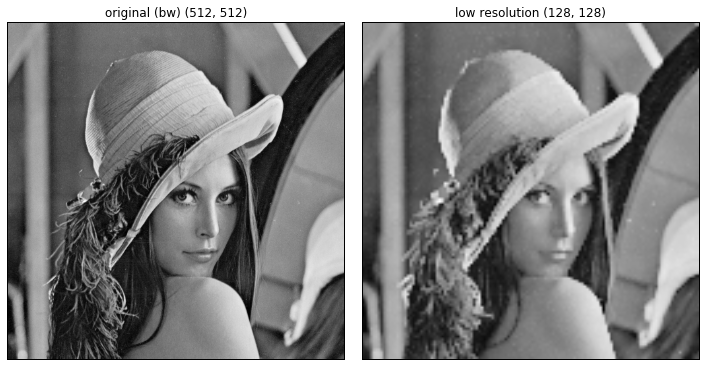

In [2]:
lena = color.rgb2gray(io.imread("../data/lena.png"));
# max-pooling to reduce dimensions to 1/4-th original size
lena_lores = block_reduce(lena, block_size=(4, 4), func=np.max)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("original (bw) {:s}".format(str(lena.shape)))
plt.xticks([])
plt.yticks([])
plt.imshow(lena, cmap=plt.get_cmap("gray"))

plt.subplot(122)
plt.title("low resolution {:s}".format(str(lena_lores.shape)))
plt.xticks([])
plt.yticks([])
plt.imshow(lena_lores, cmap="gray")
lena = lena_lores

plt.tight_layout()
plt.show()

# convolution operations easier to visualize on low resolution image
lena = lena_lores

## Basic Convolutions

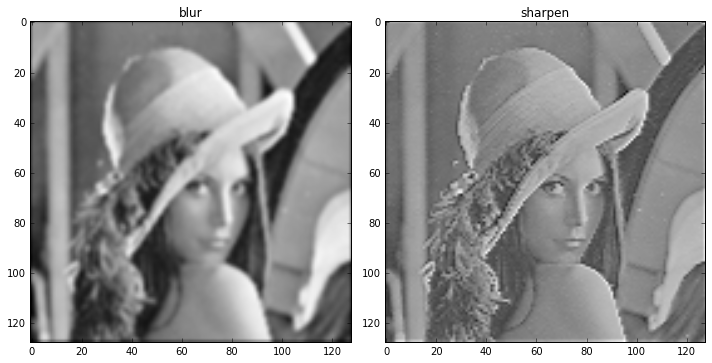

In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
blur = np.array([[0.0625, 0.125, 0.0625],
                 [0.125, 0.25, 0.125],
                 [0.0625, 0.125, 0.0625]])
lena_blur = ndimage.convolve(lena, blur, mode="constant", cval=0.0)
plt.title("blur")
plt.imshow(lena_blur, cmap="gray")

plt.subplot(122)
sharpen = np.array([[0, -1, 0],
                    [-1, 5, 1],
                    [0, -1, 0]])
lena_sharpen = ndimage.convolve(lena, sharpen, mode="constant", cval=0.0)
plt.title("sharpen")
plt.imshow(lena_sharpen, cmap="gray")

plt.tight_layout()

plt.show()

## Edge Detection (Sobel filters)

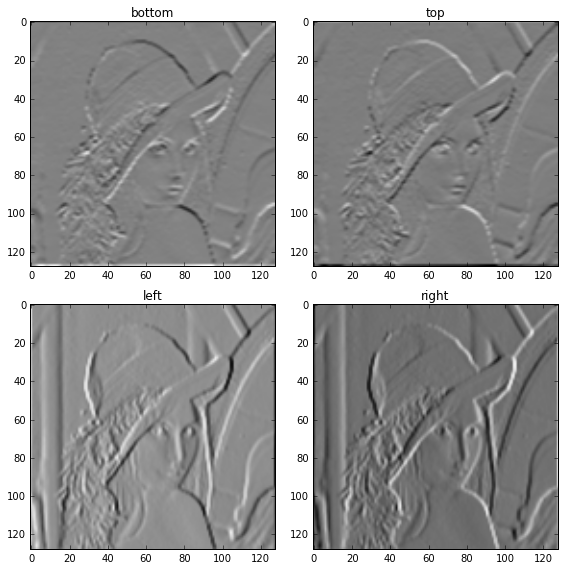

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title("bottom")
bottom_sobel = np.array([[-1, -2, -1], 
                         [0, 0, 0],
                         [1, 2, 1]])
lena_bottom_sobel = ndimage.convolve(lena, bottom_sobel, mode="constant", cval=0.0)
plt.imshow(lena_bottom_sobel, cmap="gray")

plt.subplot(222)
plt.title("top")
top_sobel = np.flipud(bottom_sobel)
lena_top_sobel = ndimage.convolve(lena, top_sobel, mode="constant", cval=0.0)
plt.imshow(lena_top_sobel, cmap="gray")

plt.subplot(223)
plt.title("left")
left_sobel = top_sobel.T
lena_left_sobel = ndimage.convolve(lena, left_sobel, mode="constant", cval=0.0)
plt.imshow(lena_left_sobel, cmap="gray")

plt.subplot(224)
plt.title("right")
right_sobel = bottom_sobel.T
lena_right_sobel = ndimage.convolve(lena, right_sobel, mode="constant", cval=0.0)
plt.imshow(lena_right_sobel, cmap="gray")

plt.tight_layout()
plt.show()

## Other Effects

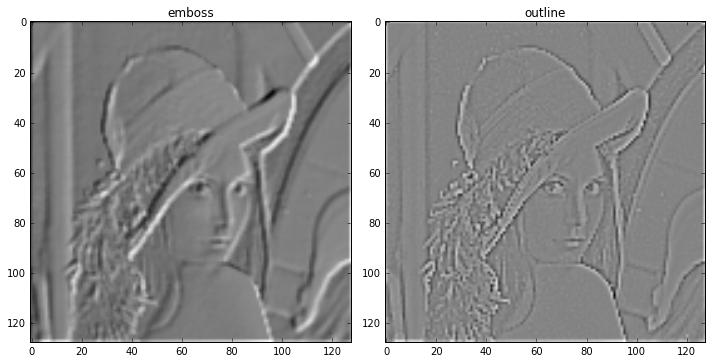

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title("emboss")
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
lena_emboss = ndimage.convolve(lena, emboss, mode="constant", cval=0.0)
plt.imshow(lena_emboss, cmap="gray")

plt.subplot(122)
plt.title("outline")
outline = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
lena_outline = ndimage.convolve(lena, outline, mode="constant", cval=0.0)
plt.imshow(lena_outline, cmap="gray")

plt.tight_layout()
plt.show()

## References

* [Image Kernels](http://setosa.io/ev/image-kernels/) - blog post by Victor Powell.